In [1]:
from qiskit import *
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_distribution
import matplotlib.pyplot as plt

plt.style.use(['science', 'notebook', 'grid', 'dark_background'])

The *Pigeonhole Paradox* is a classial probability theory problem; If you have more pigeons than pigeonholes, then at least one pigeonhole must contain more than one pigeon. A simple statement like this notaby has some interesting consequences. 

For example, if you have 367 people in a room, then at least two of them must have the same birthday. This is because there are only 366 possible birthdays (ignoring leap years), so if you have 367 people, then at least two of them must share a birthday.

Recently, Quantum Mechanics has supposedly **violated** this principle. In a quantum system, you can have two particles in the same state, even if there are only two possible states. In other words, this is *Pauli's Exclusion Principle.*

To test this using quantum circuits, we can assign pigeons to states and pigeonholes to qubits. We can then create a quantum circuit that generates a superposition $\ket{+++}$ where $$\ket{+}=\frac 1{\sqrt{2}}(\ket{0}+\ket{1})$$ is the Plus State:

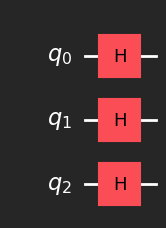

In [2]:
qc_pigeon = QuantumCircuit(3)
qc_pigeon.h([0, 1 ,2])

qc_pigeon.draw('mpl', style = 'iqx-dark')

Measuring in the $y$-basis: $$\ket{\pm i}=\frac 1{\sqrt{2}}(\ket{0}\pm i\ket{1})$$

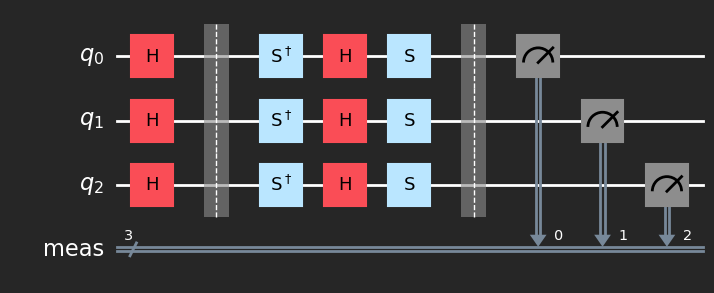

In [3]:
qc_pigeon.barrier()

qc_pigeon.sdg([0, 1, 2])
qc_pigeon.h([0, 1, 2])
qc_pigeon.s([0, 1, 2])

qc_pigeon.measure_all()
qc_pigeon.draw('mpl', style = 'iqx-dark')

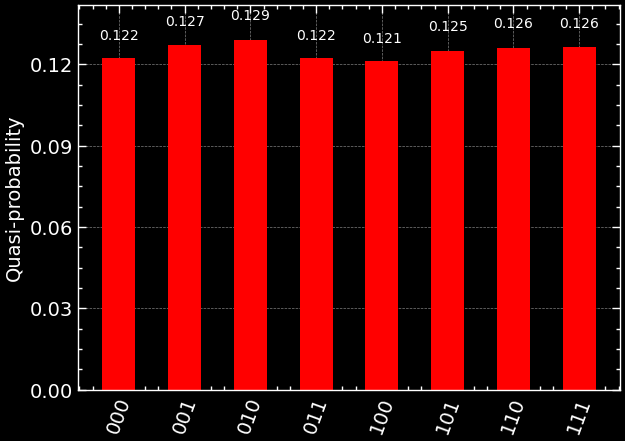

In [4]:
simulator = AerSimulator()
job = simulator.run(qc_pigeon, shots = 8000)
counts = job.result().get_counts(qc_pigeon)

plot_distribution(counts, color = 'red')

There's a combination of outcomes observed, so we'll pick $\ket{000}$, so the initial superposition $\ket{+++}\to\ket{+i+i+i}$. We can check if a pair of qubits shared a state at some point using another circuit:

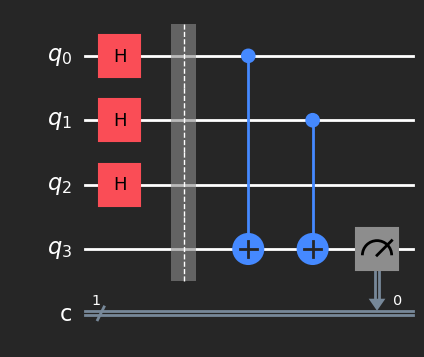

In [5]:
qc_check = QuantumCircuit(4, 1)
qc_check.h([0, 1, 2])

qc_check.barrier()
qc_check.cx([0, 1], [3, 3])

qc_check.measure(3, 0)
qc_check.draw('mpl', style = 'iqx-dark')

If both $\ket{q_0}$ and $\ket{q_1}$ are in the same state, $\ket{00}$ is observed. If they are in different states, $\ket{11}$ is observed.

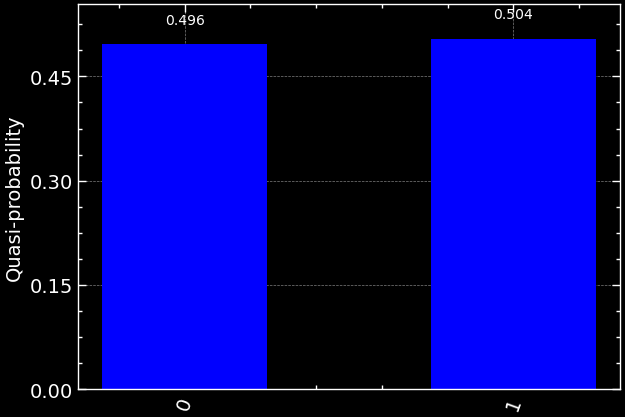

In [6]:
job = simulator.run(qc_check, shots = 8000)
counts = job.result().get_counts(qc_check)

plot_distribution(counts, color = 'blue')

Half the time, the qubits are in the same state, and they aren't the other half. Now, $$\ket{+++}\ket{0}\to(\ket{00}+\ket{11})\ket{+}\ket{0}+(\ket{01}+\ket{10})\ket{+}\ket{1}$$ represents the state overlap. The combination $$\bra{+i+i+i}(\ket{00}+\ket{11})\ket{+}$$ can be evaluated as 
1. $\bra{+i+i+i}=(\bra{0}-i\ket{1})(\bra{0}-i\ket{1})(\bra{0}-i\ket{1})=\bra{000}-i\bra{001}-\bra{110}+i\bra{111}-\cdots$
2. $(\ket{00}+\ket{11})\ket{+}=\ket{000}+\ket{001}+\ket{110}+\ket{111}$

Hence, $$\bra{+i+i+i}(\ket{00}+\ket{11})\ket{+}=\braket{000|000}-i\braket{001|001}+i\braket{111|111}-\braket{110|110}+\cdots$$ Like terms collapse the entire expression to 0.

From this $\ket{+i+i+i}$ outcome, we know that the first two pigeons **weren't** in the same hole premeasurement, extentionally valid for every combination of pigeons as well. The inference that no two qubits occupy the same state seems to be violating the Pigeonhole Principle as of yet. However, the principle notaby depends on deductions of measurements that **could've been** performed:

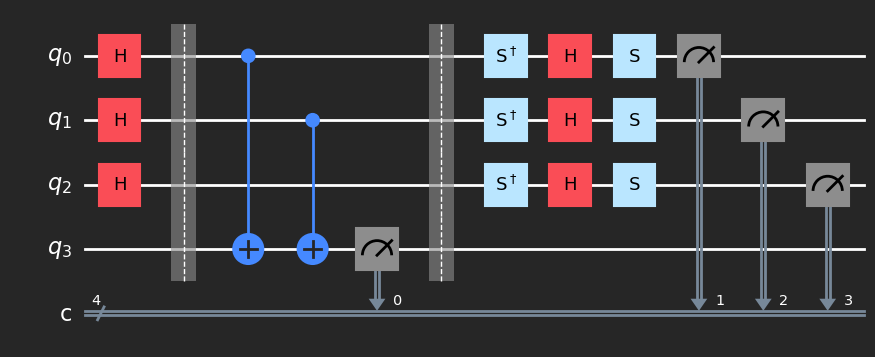

In [7]:
qc_comb = QuantumCircuit(4, 4)
qc_comb.h([0, 1, 2])

qc_comb.barrier()
qc_comb.cx([0, 1], [3, 3])
qc_comb.measure(3, 0)

qc_comb.barrier()
qc_comb.sdg([0, 1, 2])
qc_comb.h([0, 1, 2])
qc_comb.s([0, 1, 2])

qc_comb.measure([0, 1, 2], [1, 2, 3])
qc_comb.draw('mpl', style = 'iqx-dark')

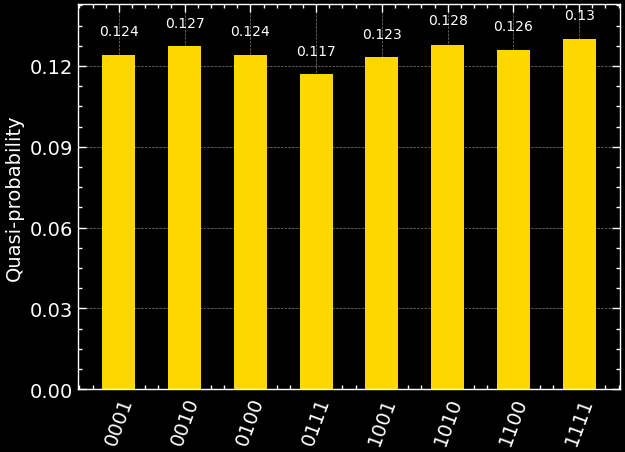

In [8]:
job = simulator.run(qc_comb, shots = 8000)
counts = job.result().get_counts(qc_comb)

plot_distribution(counts, color = 'gold')

There're no $\ket{0000}$ outcomes present, meaning that there's no case where first two qubits are in the same state and the three pigeons are in $\ket{+i+i+i}$. The Pigeonhole Principle tells us that measurements made to check qubits affects the outcome.

Instead of asking the question *Are there two pigeons in the same hole?*, we can ask *Are **three** pigeons in the same hole?*:

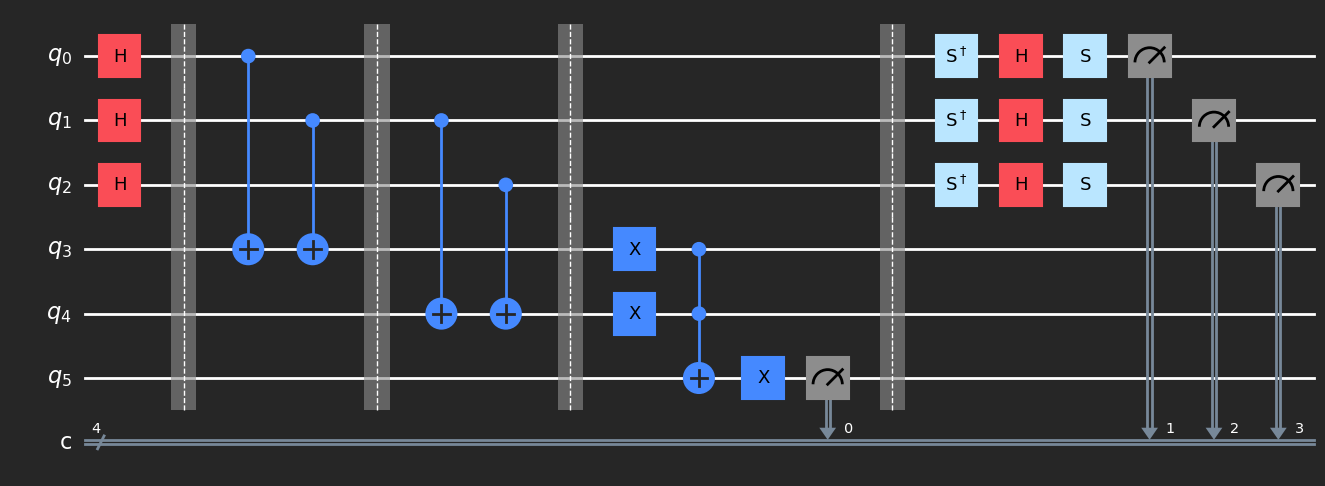

In [10]:
qc_triple = QuantumCircuit(6, 4)
qc_triple.h([0, 1, 2])

qc_triple.barrier()
qc_triple.cx([0, 1], [3, 3])

qc_triple.barrier()
qc_triple.cx([1, 2], [4, 4])

qc_triple.barrier()
qc_triple.x([3, 4])
qc_triple.ccx(3, 4, 5)
qc_triple.x(5)
qc_triple.measure(5, 0)

qc_triple.barrier()
qc_triple.sdg([0, 1, 2])
qc_triple.h([0, 1, 2])
qc_triple.s([0, 1, 2])

qc_triple.measure([0, 1, 2], [1, 2, 3])
qc_triple.draw('mpl', style = 'iqx-dark')

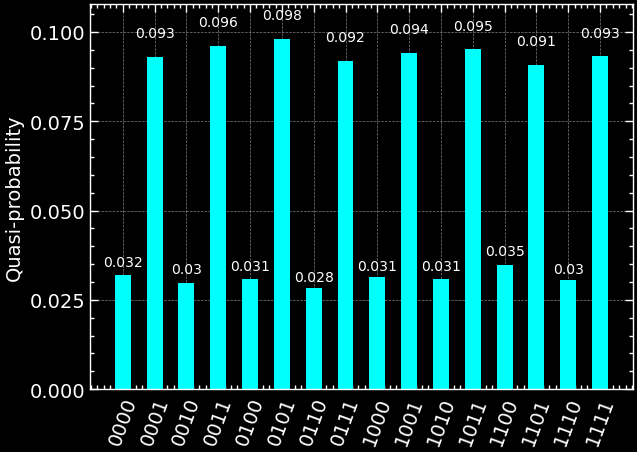

In [12]:
job = simulator.run(qc_triple, shots = 8000)
counts = job.result().get_counts(qc_triple)

plot_distribution(counts, color = 'cyan')

We do get $\ket{0000}$ here, meaning that the three pigeons can indeed possess a $\ket{+i+i+i}$ superposition. Quantum pigeons change their states depending how they're counted. Whacky!